# Kaloň malajský

![alt text](./Fruit_bat.png)

Kaloň malajský (Pteropus vampyrus) z řádu letounů se s váhou až 1,6 kg a rozpětím křídel až 1,7 m řadí na první pozici ze všech aktivně létajících savců. Černorezavě zbarvený kaloň, kterému je také přezdíváno létající liška, je rozšířen zejména v tropických oblastech jihovýchodní Asie, Austrálie, Thajska a přilehlých ostrovů, kde v mnohdy velmi početné kolonii žije svůj noční život. 

Na rozdíl od jiných druhů letounů je kaloň malajský býložravý a jeho jídelníček je tvořen převážně květy a tropickým ovocem, k čemuž je také náležitě přizpůsoben. Oproti jiným, hmyzožravým netopýrům postrádá schopnost echolokace, naproti tomu však vyniká velmi dobrým zrakem a čichem. 
V době rozmnožování si samci vytváří malé harémy samic, které ochraňují a následně se s nimi páří. Samice rodí většinou je jedno mládě o váze přibližně 133 g, o které se starají po dobu dvou až tří měsíců. 


Genom kaloně malajského byl sekvencován v rámci Mammalian Genome projekt (NIH) roku 2008, v rámci něhož bylo vybráno celkem 24 druhů savců tak, aby bylo dosaženo co největší rozmanitosti druhů a délky větve v rámci fylogenetického stromu. 
Genom o celkové velikosti přibližně 1,84 Gb obsahuje až 16 999 kódujících genů a 4171 nekódujících genů. Celkový počet transkriptů je 22 257. Geny kaloně jsou rozloženy na celkem 18 párech autosomů a 1 páru gonosomů. 


In [212]:
import pandas 
import matplotlib
import matplotlib.pyplot
import inspect
import numpy
import pylab

In [22]:
!cat Pteropus_vampyrus.pteVam1.86.gtf | grep -E "\s+gene\s+" > Pteropus_vampyrus.pteVam1.86_gene.gtf

In [23]:
!cat Pteropus_vampyrus.pteVam1.86.gtf | grep -E "\s+transcript\s+" > Pteropus_vampyrus.pteVam1.86_transcript.gtf

In [27]:
gene=pandas.read_table('Pteropus_vampyrus.pteVam1.86_gene.gtf' , header = None)

In [28]:
transcript=pandas.read_table('Pteropus_vampyrus.pteVam1.86_transcript.gtf' , header = None)

In [29]:
gene.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcript.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [32]:
def parse_attributes(attributes_str):
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out 

In [38]:
def split_attribute_column(df):
    attributes_columns = df.attribute.apply(parse_attributes).apply(pandas.Series)
    return pandas.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

gene = split_attribute_column(gene)
transcript = split_attribute_column(transcript)

In [41]:
gene.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,GeneScaffold_506,ensembl,gene,17334,227368,.,-,.,protein_coding,ENSPVAG00000001290,TASP1
1,GeneScaffold_506,ensembl,gene,287027,340620,.,-,.,protein_coding,ENSPVAG00000001295,ESF1
2,GeneScaffold_506,ensembl,gene,342642,368918,.,+,.,protein_coding,ENSPVAG00000001297,NDUFAF5
3,GeneScaffold_506,ensembl,gene,387362,497116,.,-,.,protein_coding,ENSPVAG00000001300,SEL1L2
4,GeneScaffold_506,ensembl,gene,504253,1733319,.,+,.,protein_coding,ENSPVAG00000001303,MACROD2


In [42]:
transcript.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,GeneScaffold_506,ensembl,transcript,17334,227368,.,-,.,protein_coding,ENSPVAG00000001290,TASP1,protein_coding,ENSPVAT00000001292,TASP1-201
1,GeneScaffold_506,ensembl,transcript,287027,340620,.,-,.,protein_coding,ENSPVAG00000001295,ESF1,protein_coding,ENSPVAT00000001294,ESF1-201
2,GeneScaffold_506,ensembl,transcript,342642,368918,.,+,.,protein_coding,ENSPVAG00000001297,NDUFAF5,protein_coding,ENSPVAT00000001298,NDUFAF5-201
3,GeneScaffold_506,ensembl,transcript,387362,497116,.,-,.,protein_coding,ENSPVAG00000001300,SEL1L2,protein_coding,ENSPVAT00000001301,SEL1L2-201
4,GeneScaffold_506,ensembl,transcript,504253,1733319,.,+,.,protein_coding,ENSPVAG00000001303,MACROD2,protein_coding,ENSPVAT00000001303,MACROD2-201


### 1) Celkový počet genů

In [101]:
print('Celkový počet unikátních genů je ', len(gene), ', což je více než předpokládaný součet kódujících a nekódujících genů.', sep='')


Celkový počet unikátních genů je 22194, což je více než předpokládaný součet kódujících a nekódujících genů.


### 2) Délka genů

In [62]:
gene["gene_len"] = gene["end"] - gene["start"]

In [64]:
gene.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_len
0,GeneScaffold_506,ensembl,gene,17334,227368,.,-,.,protein_coding,ENSPVAG00000001290,TASP1,210034
1,GeneScaffold_506,ensembl,gene,287027,340620,.,-,.,protein_coding,ENSPVAG00000001295,ESF1,53593
2,GeneScaffold_506,ensembl,gene,342642,368918,.,+,.,protein_coding,ENSPVAG00000001297,NDUFAF5,26276
3,GeneScaffold_506,ensembl,gene,387362,497116,.,-,.,protein_coding,ENSPVAG00000001300,SEL1L2,109754
4,GeneScaffold_506,ensembl,gene,504253,1733319,.,+,.,protein_coding,ENSPVAG00000001303,MACROD2,1229066


In [197]:
def printPandas( toPrint ):
    print(toPrint.to_string(index=False), end='')
    return   

#### Nejdelší gen 

In [203]:
max_Len = gene.loc[gene['gene_len'] == gene['gene_len'].max()]
printPandas( max_Len['gene_len'])
print('; ', end='')
printPandas( max_Len['seqname'])
print(', ', end='')
printPandas( max_Len['gene_biotype'])
print(', ', end='')
printPandas( max_Len['gene_name'])



1623898; GeneScaffold_3874, protein_coding, DMD

DMD gen kóduje protein dystrofin, který v případě člověka představuje největší gen vůbec. Je umístěn na chromosomu X, jeho dědičnost je tedy vázaná na pohlaví. Mutace v DMD genu způsobuje Duchennovu muskulární dystrofii (odtud také odvozena zkratka DMD).

#### Nejkratší gen 

In [205]:
min_Len = gene.loc[gene['gene_len'] == gene['gene_len'].min()]
printPandas( min_Len['gene_len'])
print('; ', end='')
printPandas( min_Len['seqname'])
print(', ', end='')
printPandas( min_Len['gene_biotype'])
print(', ', end='')
printPandas( min_Len['gene_name'])

23; scaffold_72526, protein_coding, NaN

### 3) Typy genů a jejich konkrétní počty

In [206]:
gene_type = gene["gene_biotype"].value_counts()
gene_type

protein_coding    16990
rRNA               1901
pseudogene         1033
miRNA               846
snRNA               644
snoRNA              604
misc_RNA            176
Name: gene_biotype, dtype: int64

Ze zjištěných hodnot je patrné, že počet genů, které kódují protein, přibližně odpovídá předpokládanému počtu 16999.

In [92]:
gene_strand = gene["strand"].value_counts()
print('Počet genů na + řetězci: ' , gene_strand[0], '\n', 'Počet genů na - řetězci: ' , gene_strand[1], sep='' )

Počet genů na + řetězci: 11183
Počet genů na - řetězci: 11011


### 4) Celkový počet transkriptů

In [100]:
print('Celkový počet trankriptů je ', len(transcript), ', což odpovídá předpokládanému počtu.', sep='')

Celkový počet trankriptů je 22257, což odpovídá předpokládanému počtu.


In [128]:
transcript["gene_id"].value_counts().describe()

count    22194.000000
mean         1.002839
std          0.058835
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: gene_id, dtype: float64

Z výše uvedených hodnot je patrné, že maximální počet transkriptů na gen jsou 3, většinou však mají geny pouze 1 transkript. 

### 5) Typy transkriptů 

In [96]:
transcript_type = transcript["transcript_biotype"].value_counts()
transcript_type

protein_coding    17053
rRNA               1901
pseudogene         1033
miRNA               846
snRNA               644
snoRNA              604
misc_RNA            176
Name: transcript_biotype, dtype: int64

In [97]:
transcript_strand = transcript["strand"].value_counts()
print('Počet transkriptů na + řetězci: ' , transcript_strand[0], '\n', 'Počet transkriptů na - řetězci: ' , transcript_strand[1], sep='' )

Počet transkriptů na + řetězci: 11219
Počet transkriptů na - řetězci: 11038


### 6) Počet chromosomů 

V tabulce nejsou chromosomy uvedeny, místo nich je manipulováno se "scaffoldy", které ve větším počtu či samostatně tvoří chromosom. 

In [108]:
print('Nejčastěji se vyskytující scaffoldy: ', '\n', '\n', gene["seqname"].value_counts().head(), sep = '') 


Nejčastěji se vyskytující scaffoldy: 

GeneScaffold_2976    50
GeneScaffold_2550    49
GeneScaffold_2543    44
scaffold_4524        41
GeneScaffold_1015    40
Name: seqname, dtype: int64


### Graf č. 1: Zastoupení jednotlivých typů genů 

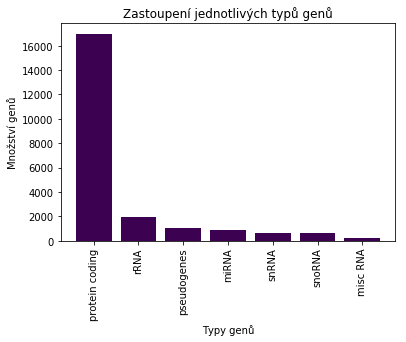

In [125]:
y_pos = numpy.arange(7)
matplotlib.pyplot.bar(y_pos, gene_type,align='center', alpha=1, color='#3d0151') 
matplotlib.pyplot.xticks(y_pos, ["protein coding","rRNA","pseudogenes","miRNA","snRNA","snoRNA","misc RNA"])
matplotlib.pyplot.ylabel('Množství genů')
matplotlib.pyplot.xlabel("Typy genů")
matplotlib.pyplot.title('Zastoupení jednotlivých typů genů')
for ax in matplotlib.pyplot.gcf().axes:
    matplotlib.pyplot.sca(ax)
    matplotlib.pyplot.xticks(ax.get_xticks(), rotation=90)
matplotlib.pyplot.show()

### Graf č. 2: Zastoupení jednotlivých typů transkriptů

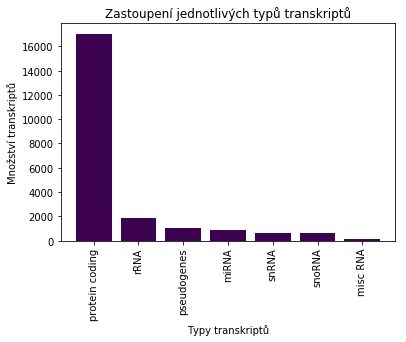

In [127]:
y_pos = numpy.arange(7)
matplotlib.pyplot.bar(y_pos, transcript_type,align='center', alpha=1, color='#3d0151') 
matplotlib.pyplot.xticks(y_pos, ["protein coding","rRNA","pseudogenes","miRNA","snRNA","snoRNA","misc RNA"])
matplotlib.pyplot.ylabel('Množství transkriptů')
matplotlib.pyplot.xlabel("Typy transkriptů")
matplotlib.pyplot.title('Zastoupení jednotlivých typů transkriptů')
for ax in matplotlib.pyplot.gcf().axes:
    matplotlib.pyplot.sca(ax)
    matplotlib.pyplot.xticks(ax.get_xticks(), rotation=90)
matplotlib.pyplot.show()